# FUTURE SALES PREDICTION - FINAL PREDICTION

## Importing the libraries

In [1]:
import joblib as jb
feature_selection=jb.load('files/train/model/feature_selected_model.pkl')
encode_model=jb.load('files/train/model/train_encode_model.pkl')
model=jb.load('files/train/model/gb.pkl')

In [2]:
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Create a def function called flow that takes two parameters as x_path,y_path. The steps for creating the def function is as folllows**

In [3]:
def flow (x_path,y_path):
    #read
    x_test=pd.read_csv(x_path)
    y_test=pd.read_csv(y_path)
    
    # encode
    encode_data=encode_model.transform(x_test)
    encode_data=pd.DataFrame(encode_data, columns=x_test.columns)
    
    # Feature_selection
    feature_selected=encode_data[feature_selection]

    # predcit
    y_pred=pd.DataFrame(model.predict(feature_selected))
    
    #metrics
    MAE=mean_absolute_error(y_pred,y_test)
    MSE=mean_squared_error(y_pred,y_test)
    RMSE=sqrt(mean_squared_error(y_pred,y_test))
    R2=r2_score(y_pred,y_test)
    
    return y_pred,MAE,MSE,RMSE,R2

In [4]:
y_pred,MAE,MSE,RMSE,R2=flow('test data/raw/x_test_final.csv','test data/y.csv')

In [5]:
MAE

0.47227233018155657

In [6]:
MSE

1.205733164235825

In [7]:
RMSE

1.0980588163827223

In [8]:
R2

0.9625605366643593

In [9]:
y_pred

,0
0,18.352189
1,11.106546
2,16.609012
3,2.998429
4,12.743404
...,...
2664,2.920983
2665,17.554419
2666,1.130976
2667,18.149297


**To see the name of the video game we can do the following :**

In [10]:
y_title=pd.read_csv('test data/raw/x_test_final.csv')
y_pred['title']=y_title['title']

In [11]:
y_pred

,0,title
0,18.352189,Vector TD
1,11.106546,Gaitame Baibai Trainer Kabutore FX
2,16.609012,Space Invaders Invasion Day
3,2.998429,SimCity 4
4,12.743404,Numba
...,...,...
2664,2.920983,UFC Sudden Impact
2665,17.554419,The Polar Express
2666,1.130976,Terminator Salvation
2667,18.149297,RUSH


## Histogram plot to visualize the future sales

In [12]:
x_graph=pd.read_csv('test data/raw/test.csv')
x_graph['global_sales']

0       18.07
1       11.90
2       16.77
3        3.00
4       12.32
        ...  
2664     2.89
2665    17.51
2666     0.96
2667    18.21
2668    20.60
Name: global_sales, Length: 2669, dtype: float64

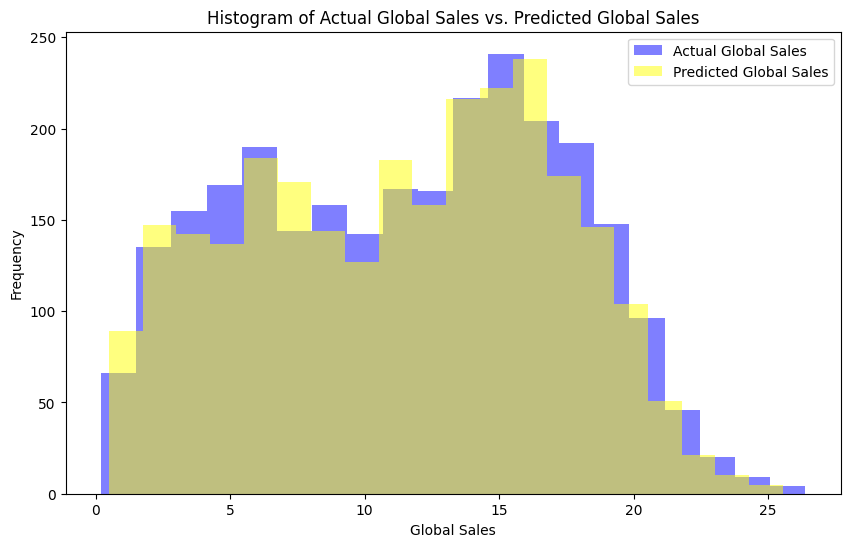

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

# Plot histogram for actual global sales
plt.hist(x_graph['global_sales'],bins=20,alpha=0.5,color='blue',label='Actual Global Sales')

# Plot histogram for predicted global sales
plt.hist(y_pred[0],bins=20,alpha=0.5,color='yellow',label='Predicted Global Sales')

plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Global Sales vs. Predicted Global Sales')
plt.legend()
plt.show()